In [9]:
# NetworkX for network representation
import networkx as nx

In [10]:
# Some handy mathematical functions
import math
# Random numbers from numpy
import numpy as np
import numpy.random as rnd
# Important elements of matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import matplotlib.cm as cmx
# Plot all graphics in-line in the notebook
%matplotlib inline

In [32]:
SPREADING_SUSCEPTIBLE = 'S'
SPREADING_INFECTED = 'I'
SPREADING_RECOVERED = 'R'
def spreading_init( g ):
    """Initialise all node in the graph to be susceptible."""
    for i in g.node.keys():
        er.node[i]['state'] = SPREADING_SUSCEPTIBLE

In [33]:
def spreading_seed( g, pSick ):
    """Inject a random proportion of nodes in the graph."""
    for i in g.node.keys():
        if(rnd.random() <= pSick):
            er.node[i]['state'] = SPREADING_INFECTED

In [34]:
def spreading_make_sir_model( pInfect, pRecover ):
    """Return an SIR model function for given infection and
       recovery probabilities."""
    # model (local rule) function
    def model( g, i ):
        if g.node[i]['state'] == SPREADING_INFECTED:
            # infect susceptible neighbours with probability pInfect
            for m in g.neighbors(i):
                if g.node[m]["state"]==SPREADING_SUSCEPTIBLE:
                    if rnd.random() <= pInfect:
                        g.node[m]["state"]=SPREADING_INFECTED
            # recover with probability pRecover
            if rnd.random( ) <= pRecover:
                g.node[i]['state']=SPREADING_RECOVERED
    return model               
    

In [35]:
def spreading_step( g, model ):
    """Run a single step of the model over the graph."""
    for i in g.node.keys():
        model(g, i)

In [36]:
def spreading_run( g, model, iter ):
    """"Run a number of iterations of the model over the graph."""
    for i in xrange(iter):
        spreading_step(g, model)

In [37]:
n = 100
er = nx.erdos_renyi_graph(n, 0.01)

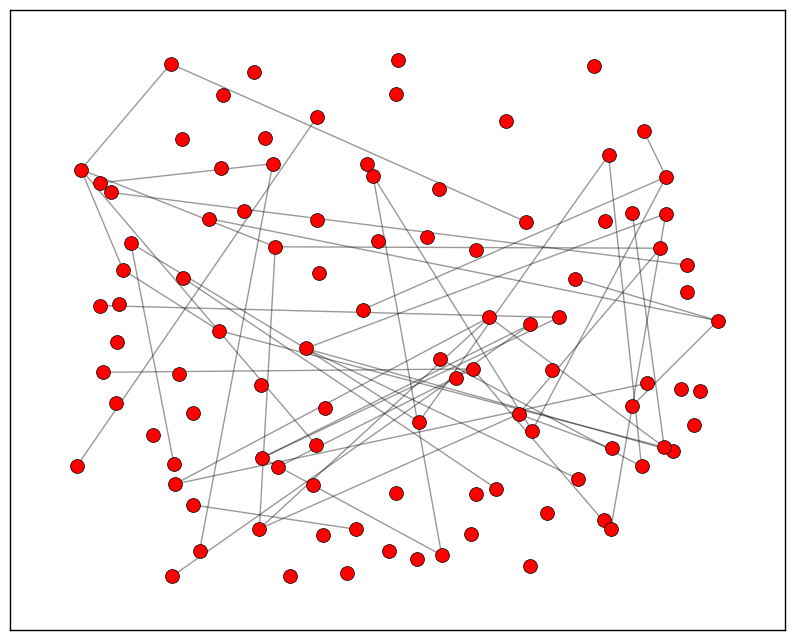

In [38]:
fig = plt.figure(figsize=(10, 8))
# some visual styling for the figure
ax = fig.gca()
ax.grid(False) # no grid
ax.get_xaxis().set_ticks([]) # no ticks on the axes
ax.get_yaxis().set_ticks([])
# run the spring layout algorithm over the network
pos = nx.spring_layout(er, iterations = 2, k = 2/math.sqrt(n))
# draw the network using the computed positions for the nodes
nx.draw_networkx_edges(er, pos, width = 1, alpha = 0.4)
nx.draw_networkx_nodes(er, pos, node_size=100, alpha = 1,
linewidths = 0.5)
plt.show()

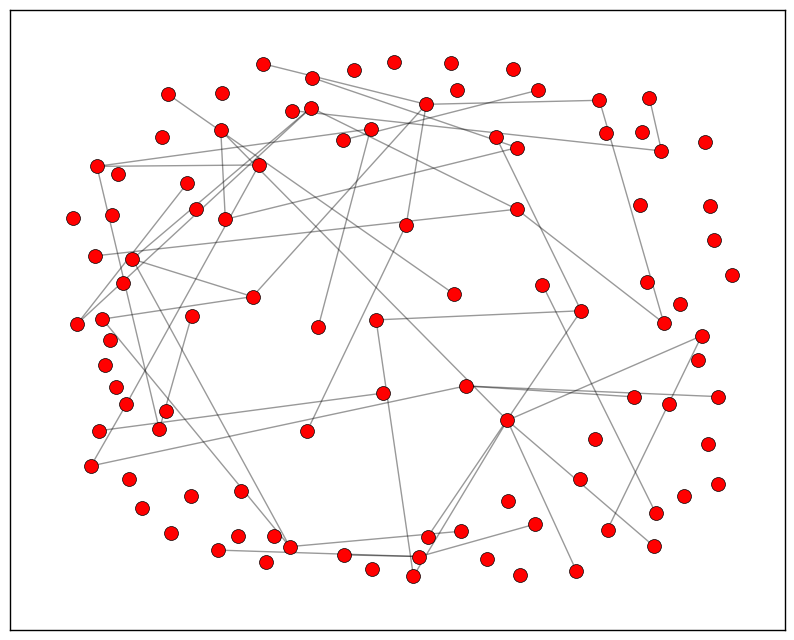

In [44]:
fig = plt.figure(figsize=(10, 8))
# some visual styling for the figure
ax = fig.gca()
ax.grid(False) # no grid
ax.get_xaxis().set_ticks([]) # no ticks on the axes
ax.get_yaxis().set_ticks([])
# run the spring layout algorithm over the network
pos = nx.spring_layout(er, iterations = 10, k = 2/math.sqrt(n))
# draw the network using the computed positions for the nodes
nx.draw_networkx_edges(er, pos, width = 1, alpha = 0.4)
nx.draw_networkx_nodes(er, pos, node_size=100, alpha = 1,
linewidths = 0.5)
plt.show()

In [41]:
# initialise with 5% sick people
spreading_init(er)
spreading_seed(er, 0.05)

In [42]:
#Finally, we create the network dynamics:
# SIR model with 30% infection rate and 10% recovery rate
model = spreading_make_sir_model(0.3, 0.05)

In [43]:
# run SIR model dynamics over the network
spreading_run(er, model, 100)